### 8) 부분회귀 플롯

In [ ]:
# 새로운 독립변수를 추가하여 다시 회귀분석을 하면 기존 가중치 벡터의 값은 변경된다.
# 부분회귀플롯:독립변수가 여러개일 때 특정한 하나의 독립변수의 영향력을 시각화하는 방법

In [2]:
# pip install scikit-learn==1.0.2

     ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
      --------------------------------------- 0.1/7.2 MB 5.1 MB/s eta 0:00:02
     - -------------------------------------- 0.3/7.2 MB 5.2 MB/s eta 0:00:02
     -- ------------------------------------- 0.5/7.2 MB 4.0 MB/s eta 0:00:02
     --- ------------------------------------ 0.6/7.2 MB 3.7 MB/s eta 0:00:02
     ---- ----------------------------------- 0.7/7.2 MB 3.5 MB/s eta 0:00:02
     ---- ----------------------------------- 0.8/7.2 MB 3.3 MB/s eta 0:00:02
     ----- ---------------------------------- 1.0/7.2 MB 3.2 MB/s eta 0:00:02
     ----- ---------------------------------- 1.0/7.2 MB 3.0 MB/s eta 0:00:03
     ------ --------------------------------- 1.2/7.2 MB 2.9 MB/s eta 0:00:03
     ------ --------------------------------- 1.2/7.2 MB 2.8 MB/s eta 0:00:03
     ------- -------------------------------- 1.4/7.2 MB 2.8 MB/s eta 0:00:03
     -------- ------------------------------- 1.5/7.2 MB 2.7 MB/s eta 0

In [3]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

df = pd.concat([dfX, dfy], axis=1)
df

c:\Python3.9.13\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
import statsmodels.api as sm

model = sm.OLS(dfy, dfX)
#          최소자승법(종속(y), 독립(X))

result = model.fit()
print(result.summary())

# R-squared : 모형의 설명력     coef : 회귀계수(기울기)   pvalue : 유의확률   

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Fri, 18 Aug 2023   Prob (F-statistic):                        0.00
Time:                        09:50:02   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<Axes: xlabel='AGE', ylabel='MEDV'>

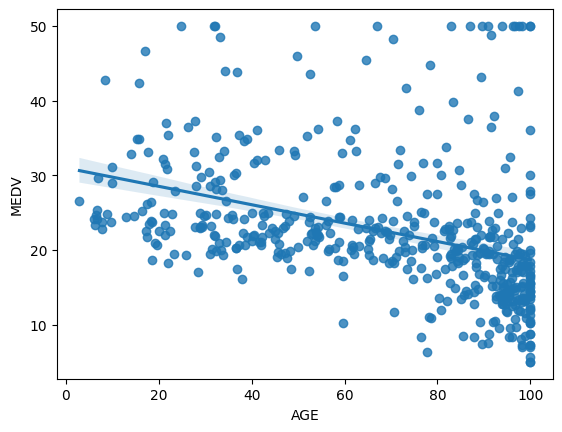

In [5]:
%matplotlib inline
import seaborn as sns

#age와 medv는 음의 상관관계가 있는 것처럼 보인다.
#이 부분플롯은 순수하게 age와 medv의 상관관계를 표현한 것이 아님.
sns.regplot(x="AGE", y="MEDV", data=df)

In [6]:
# A.difference(B) A-B 차집합

others = list(set(df.columns).difference(set(["MEDV", "AGE"])))
#             집합_중복값 제거
others

['CRIM',
 'DIS',
 'PTRATIO',
 'RM',
 'NOX',
 'TAX',
 'INDUS',
 'ZN',
 'B',
 'CHAS',
 'RAD',
 'LSTAT']

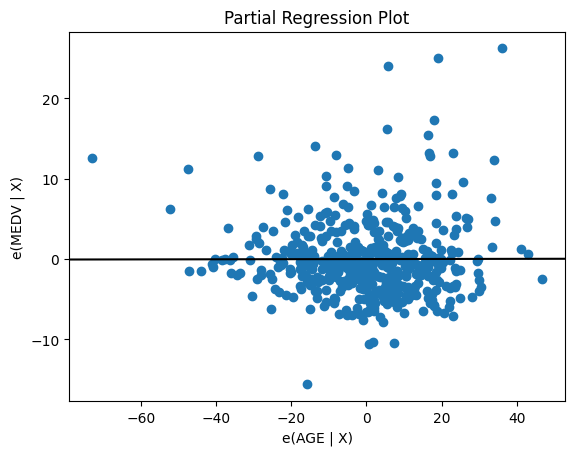

In [7]:
from statsmodels.graphics.regressionplots import plot_partregress
import matplotlib.pyplot as plt

# others : AGE를 제외한 나머지 독립변수들
# obs_labels : 데이터 라벨링 여부
plot_partregress("MEDV", "AGE", others, data=df, obs_labels=False)
# 부분회귀          y       x     배제

plt.show()
#부분회귀 플롯을 볼 때 age와 medv는 상관관계가 없다.
#가로축의 값은 독립변수 자체의 값이 아닌
# 어떤 독립변수에서 다른 독립변수의 영향을 제거한 값

[]

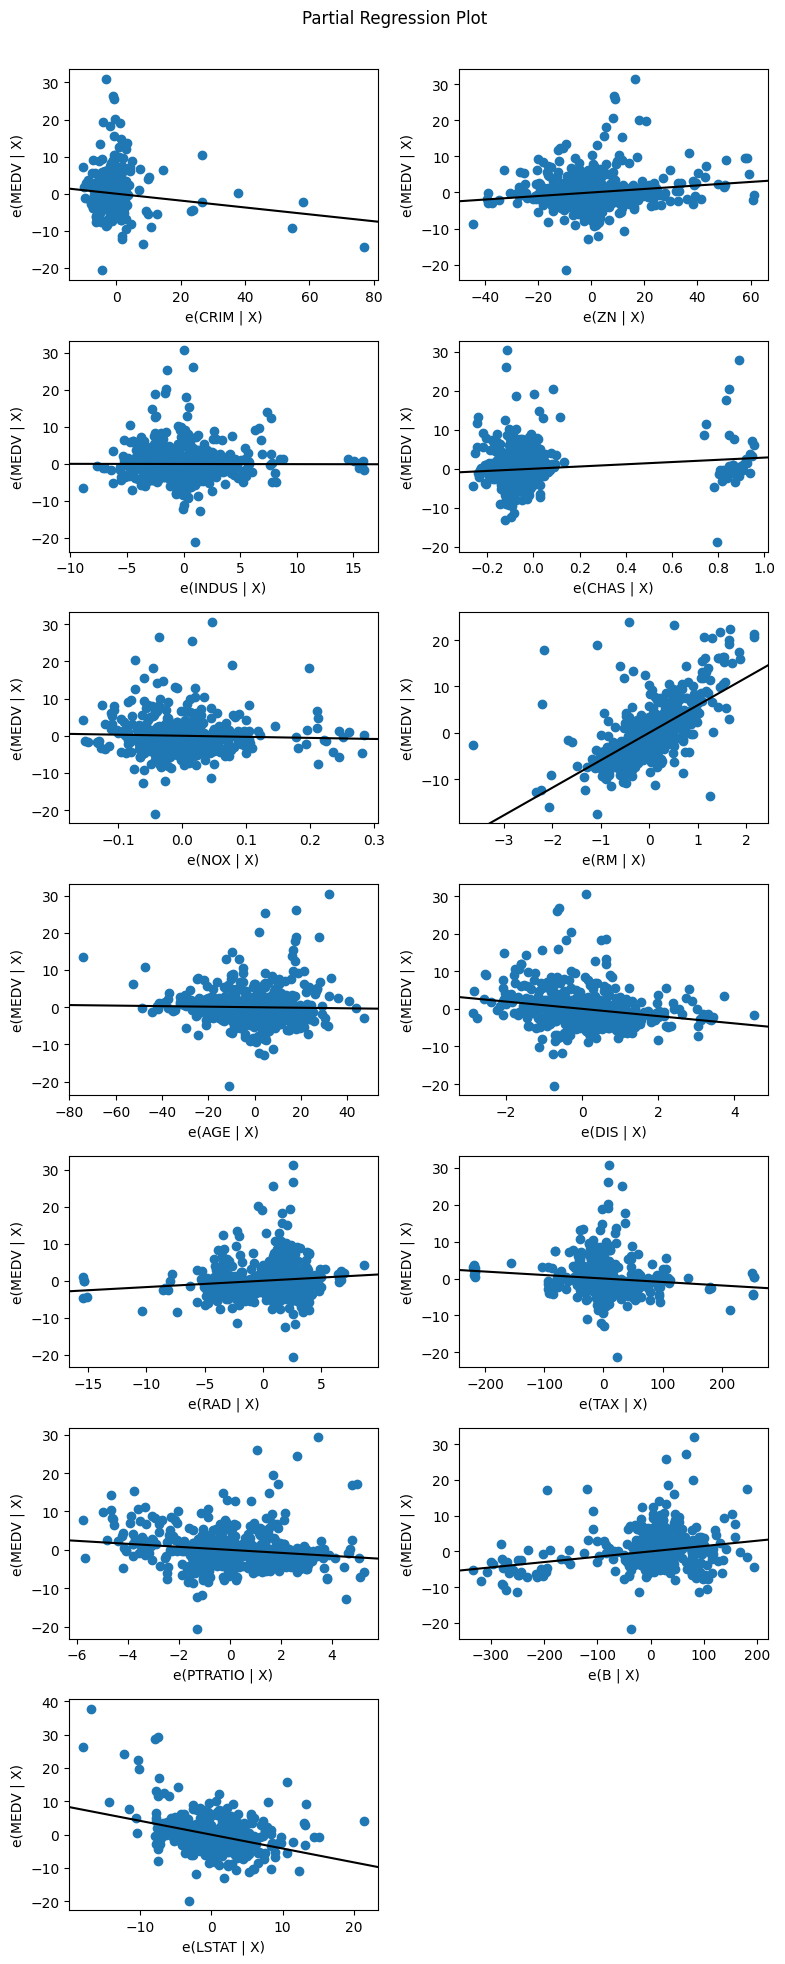

In [8]:
#전체 데이터에 대해 한번에 부분회귀 플롯을 그리는 함수
from statsmodels.graphics.regressionplots import plot_partregress_grid
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 20))

# result: 학습 완료된 모형
plot_partregress_grid(result, fig=fig)
plt.plot() 